In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2022-04-24 / Aki Taanila


# Seaborn

Seaborn on matplotlibin päälle rakennettu grafiikka-kirjasto, joka tarjoaa helppoja tapoja kaavioiden luontiin suoraan raakadatasta. Kaavioita voi muotoilla kuten mitä tahansa matplotlib-kaavioita, joten muotoilu edellyttää matplotlib-osaamista. Katso esimerkiksi https://tilastoapu.wordpress.com/2019/07/02/kuviot-ja-kaaviot-pythonilla/

Tässä notebooksissa on esimerkkejä seuraavista kaaviolajeista:

* **countplot** - lukumääräyhteeveto kategoriselle muuttujalle
* **histplot** -  luokiteltu jakauma määrälliselle muuttujalle
* **barplot** - virhemarginaaleilla varustettu pylväskaavio keskiarvoista
* **boxplot** - viiden luvun yhteeveto
* **scatterplot** - hajontakaavio, joka havainnollistaa kahden määrällisen muuttujan riippuvuutta
* **jointplot** - hajontakaavio täydennettynä mukana olevien muuttujien jakaumilla
* **pairplot** - useiden muuttujaparien hajontakaaviot samalla kertaa
* **heatmap** - tällä voin havainnollistaa esimerkiksi korrelaatiomatriisia

Tässä notebookissa on myös esimerkkejä usean kaavion kuvioista käyttäen **catplot**-, **displot**- ja **relplot**-funktioita.

Seaborn-kaavioita on helppo laatia, jos ymmärtää keskeiset parametrit:

* **x**
* **y**
* **hue** (minkä muuttujan mukaan värierottelu)
* **data**
* **row** (yhdistelmäkaavioiden catplot, displot ja relplot yhteydessä)
* **col** (yhdistelmäkaavioiden catplot, displot ja relplot yhteydessä)
* **kind** (kaaviolaji yhdistelmäkaavioiden catplot, displot ja relplot yhteydessä)


## Seaborn-kaavioiden värit ja koot

Kaavion luonnissa voin määrittää värin **color**-parametrin arvona. Esimerkiksi tämän muistion ensimmäiseen kaavioon saan pylväille vihreän värin seuraavasti: `dsns.countplot(x='size', data=tips, color='green')`. Reunavärin voin määrittää **edgecolor**-parametrilla.

Värejä: https://matplotlib.org/stable/gallery/color/named_colors.html

Kaavion luonnissa voit määrittää käytettävän värikartan **palette**-parametrilla. Esimerkiksi tämän muistion ensimmäisessä kaaviossa voin vaihtaa värikartaksi Greens: `sns.countplot(x='size', data=tips, palette='Greens')`

Värikarttoja: https://matplotlib.org/stable/tutorials/colors/colormaps.html

Yksittäisen kaavion koon voin määrittää luomalla kaaviota ympäröivän kuvion (figure) ennen kaavion luomista. Esimerkiksi `plt.figure(figsize=(10,6)`.

Yhdistelmäkaavion (catplot, displot, relplot, jointplot) kokoa säädän **height**- ja **aspect**-parametreillä.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-whitegrid")

In [3]:
# Esimerkkidata ravintolaseurueiden tipeistä
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## countplot

Sopii kategoristen muuttujien lukumääräyhteenvetoihin.

https://seaborn.pydata.org/generated/seaborn.countplot.html

<AxesSubplot:xlabel='size', ylabel='count'>

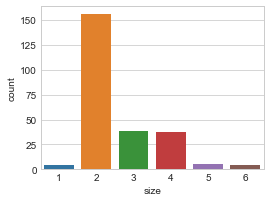

In [4]:
# Eri kokoisten seurueiden lukumäärät
plt.figure(figsize=(4, 3))
sns.countplot(x='size', data=tips)

<AxesSubplot:xlabel='day', ylabel='count'>

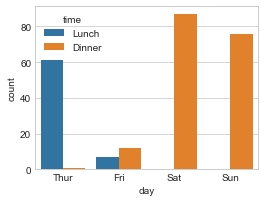

In [5]:
# Lounas- ja päivällisseurueiden lukumäärät eri viikonpäivinä
plt.figure(figsize=(4, 3))
sns.countplot(x='day', hue='time', data=tips)

**For**-toistorakennetta käyttäen voin esittää usean muuttujan jakaumat yhdessä kuviossa, joka sisältää monta kaaviota.

Komento `fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,3))` luo kuvion, jossa on 4 kaaviota vierekkäin (ncols=4). Komento palauttaa sekä kuvion (fig) että sen sisältämien kaavioiden listan (axs).

**Enumerate**-funktio palauttaa sekä kategoriset-listan muuttujien järjestysnumerot että muuttujien nimet. Järjestysnumeroita tarvitaan osoittamaan mihin kaavioon mikäkin muuttuja sijoitetaan (`ax=axs[i]`).

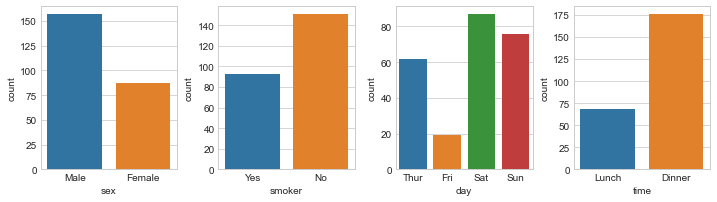

In [6]:
# Kategoristen muuttujien lukumääräyhteenvedot

kategoriset = ['sex', 'smoker', 'day', 'time']

# Neljän kaavion kokoelma
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,3))

for i, var in enumerate(kategoriset):
    sns.countplot(x=var, data=tips, ax=axs[i])
    
# Kaavioiden välinen tyhjä tila
fig.subplots_adjust(wspace=0.3)

countplot sopii käytettäväksi <b>catplot</b>-toiminnon yhteydessä (kind = 'count'). Tällöin voin esittää useita kaavioita kategoristen muuttujien määräämille ryhmille. Seuraavassa ryhmittelevinä kategorisina muuttujina ovat sex (`col='sex'`) ja smoker (`row='smoker'`).

https://seaborn.pydata.org/generated/seaborn.catplot.html

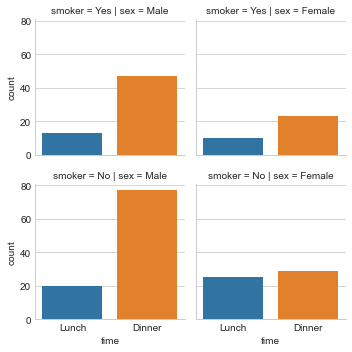

In [7]:
# Lounas- ja päivällisseurueiden lukumäärät sukupuolen ja tupakoinnin mukaan
sns.catplot(x='time', col='sex', row='smoker', data=tips, kind='count', height=2.5)

## histplot

Sopii määrällisen muuttujan luokitellun jakauman esittämiseen.

https://seaborn.pydata.org/generated/seaborn.histplot.html

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

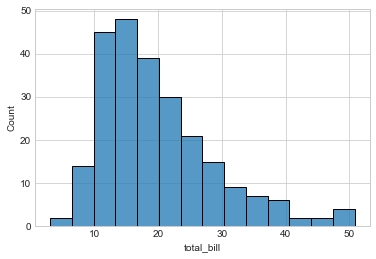

In [8]:
# Laskun loppusummien jakauma
sns.histplot(x='total_bill', data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

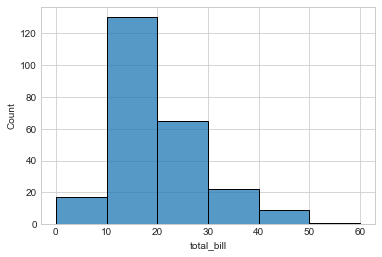

In [9]:
# Itse määritellyt luokkarajat
sns.histplot(x='total_bill', data=tips, bins=[0, 10, 20, 30, 40, 50, 60])

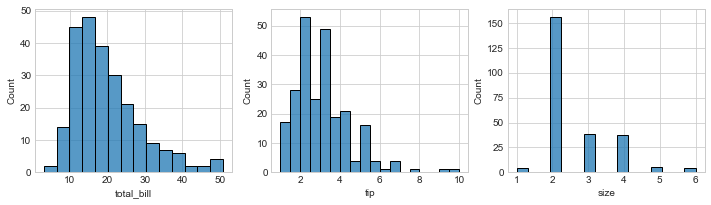

In [10]:
# Määrällisten muuttujien histogrammit

maaralliset = ['total_bill', 'tip', 'size']

# Kolmen kaavion kokoelma
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

for i, var in enumerate(maaralliset):
    sns.histplot(x=var, data=tips, ax=axs[i])

histplot sopii käytettäväksi **displot**-funktion yhteydessä. Tällöin voin esittää useita histogrammeja kategoristen muuttujien määräämille ryhmille.

https://seaborn.pydata.org/generated/seaborn.displot.html

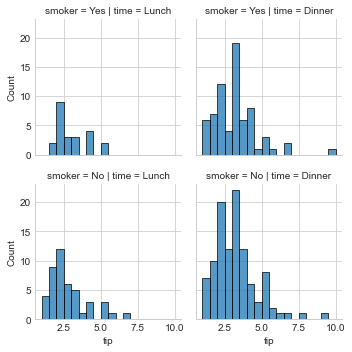

In [11]:
# tipin jakaumat tupakoinnin ja ajan mukaan
sns.displot(x='tip', row='smoker', col='time', kind='hist', data=tips, height=2.5)

## barplot

Sopii keskiarvojen esittämiseen. Musta viiva havainnoillistaa virhemarginaalin (luottamusväli).

https://seaborn.pydata.org/generated/seaborn.barplot.html

<AxesSubplot:xlabel='day', ylabel='tip'>

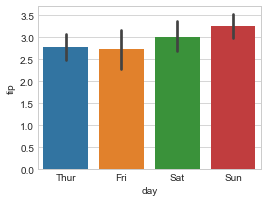

In [12]:
# Eri päivien tippien keskiarvot
plt.figure(figsize=(4, 3))
sns.barplot(x='day', y='tip', data=tips)

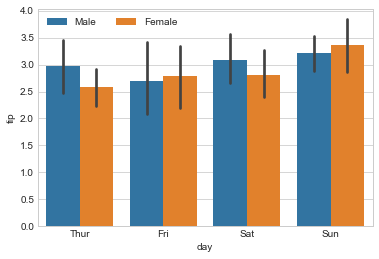

In [13]:
# Eri päivien tippien keskiarvot sukupuolen mukaan
sns.barplot(x='day', y='tip', hue='sex', data=tips)
plt.legend(ncol=2)

barplot sopii käytettäväksi **catplot**-funktion yhteydessä (**kind='bar'**). Tällöin voin esittää useita kaavioita kategoristen muuttujien määräämille ryhmille.

https://seaborn.pydata.org/generated/seaborn.catplot.html

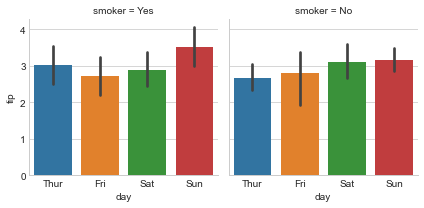

In [14]:
# Eri päivien tippien keskiarvot tupakoinnin mukaan
sns.catplot(x='day', y='tip', col='smoker', data=tips, kind='bar', height=3)

## boxplot

Havainnollistaa viiden luvun yhteenvedon (pienin, alaneljännes, mediaani, yläneljännes, suurin). Lisäksi muista selvästi poikkeavat havainnot esitetään erillisinä pisteinä.

https://seaborn.pydata.org/generated/seaborn.boxplot.html

<AxesSubplot:xlabel='tip'>

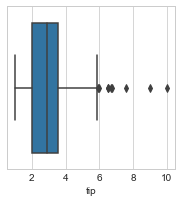

In [15]:
# Tipin suuruuden jakauma tunnuslukuina
plt.figure(figsize=(3, 3))
sns.boxplot(x='tip', data=tips)

<AxesSubplot:xlabel='time', ylabel='tip'>

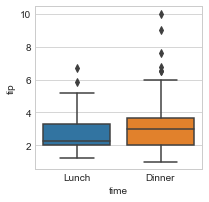

In [16]:
# Tipin suuruus lounas- ja päivällisseurueille
plt.figure(figsize=(3, 3))
sns.boxplot(x='time', y='tip', data=tips)

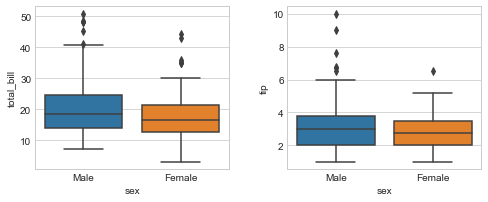

In [17]:
# boxplot() usealle muuttujalle (total_bill ja tip) sukupuolen mukaan

# Kahden kaavion kokoelma
fig, axs = plt.subplots(1, 2, figsize=(8, 3))

sns.boxplot(x='sex', y='total_bill', data=tips, ax=axs[0])
sns.boxplot(x='sex', y='tip', data=tips, ax=axs[1])

# Kaavioiden etäisyys toisistaan
fig.subplots_adjust(wspace=0.3)

boxplot sopii käytettäväksi **catplot**-funktion yhteydessä (**kind='box'**). Tällöin voin esittää useita kaavioita kategoristen muuttujien määräämille ryhmille.

https://seaborn.pydata.org/generated/seaborn.catplot.html

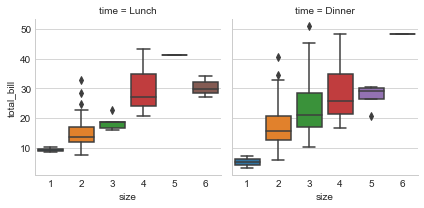

In [18]:
# Laskun loppusumma seurueen koon ja ajan mukaan
sns.catplot(x='size', y='total_bill', col='time', data=tips, kind='box', height=3)

<h2>scatterplot</h2>

Havainnollistaa kahden määrällisen muuttujan välisen riippuvuuden.

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

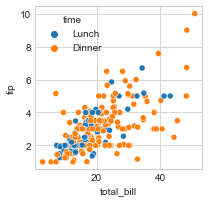

In [19]:
plt.figure(figsize=(3, 3))
sns.scatterplot(x='total_bill', y='tip', hue='time', data=tips)

scatterplot sopii käytettäväksi **relplot**-funktion yhteydessä (**kind='scatter'**). Tällöin voin esittää useita kaavioita kategoristen muuttujien määräämille ryhmille.

https://seaborn.pydata.org/generated/seaborn.relplot.html

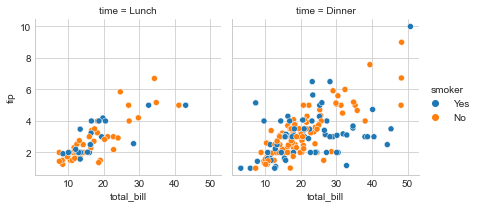

In [20]:
# Laskun loppusumma ajan mukaan. Värierottelu tupakoinnin mukaan.
sns.relplot(data=tips, x='total_bill', y='tip', col='time', hue='smoker', kind='scatter', height=3)

## jointplot

Havainnollistaa kahden määrällisen muuttujan välisen riippuvuuden ja esittää samalla kummankin muuttujan jakaumat.

http://seaborn.pydata.org/generated/seaborn.jointplot.html

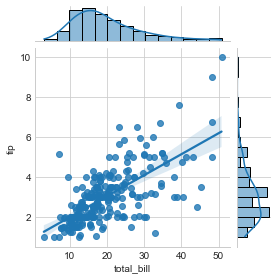

In [21]:
# Laskun loppusumman ja tipin välinen riippuvuus
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg', height=4)

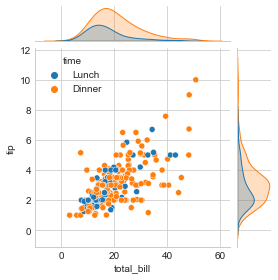

In [22]:
# Värierottelu ajan mukaan
sns.jointplot(x='total_bill', y='tip', hue='time', data=tips, height=4)

In [23]:
# Avaan vielä toisen datan, jossa on pisteitä eri osaamisista ja opintomenestyksestä
opintomenestys = pd.read_excel('https://taanila.fi/opintomenestys.xlsx')
opintomenestys.head()

,koehenkilö,verbaalinen,looginen,kielet,matematiikka,opintomenestys,sukupuoli
0,2,26,32,8.2,7,16,Nainen
1,3,29,33,9.6,5,17,Nainen
2,6,28,36,9.2,7,19,Nainen
3,7,23,34,7.2,7,14,Nainen
4,10,29,34,9.7,8,19,Nainen


In [24]:
# Pudotan tarpeettoman muuttujan pois
opintomenestys = opintomenestys.drop('koehenkilö', axis=1)
opintomenestys.head()

,verbaalinen,looginen,kielet,matematiikka,opintomenestys,sukupuoli
0,26,32,8.2,7,16,Nainen
1,29,33,9.6,5,17,Nainen
2,28,36,9.2,7,19,Nainen
3,23,34,7.2,7,14,Nainen
4,29,34,9.7,8,19,Nainen


## pairplot

Esittää hajontakaaviot kaikille numeerisille muuttujille.

https://seaborn.pydata.org/generated/seaborn.pairplot.html

Kannattaa käyttää harkintaa mukaan otettavien muuttujien lukumäärän suhteen (liian suuri muuttujien määrä johtaa lukukelvottomaan kaavioon). Pitkät muuttujien nimet aiheuttavat ongelmia luettavuudessa.

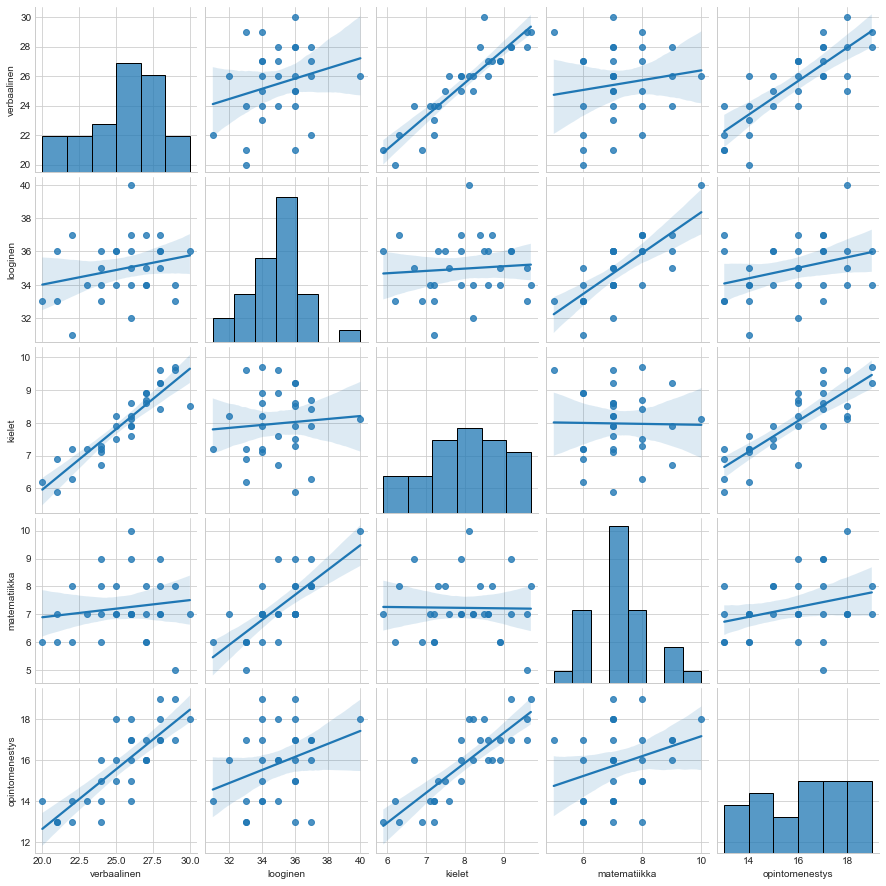

In [25]:
sns.pairplot(data=opintomenestys, kind='reg')

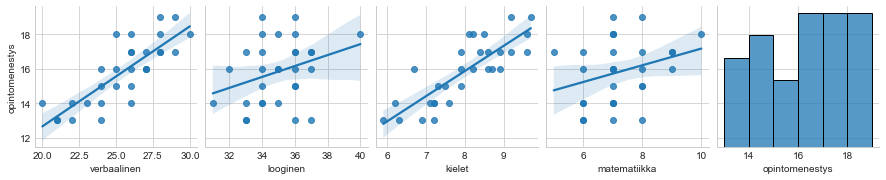

In [26]:
# Tässä tarkastelen ainoastaan opintomenestyksen riippuvuutta muista muuttujista
sns.pairplot(data=opintomenestys, y_vars=['opintomenestys'], kind='reg')

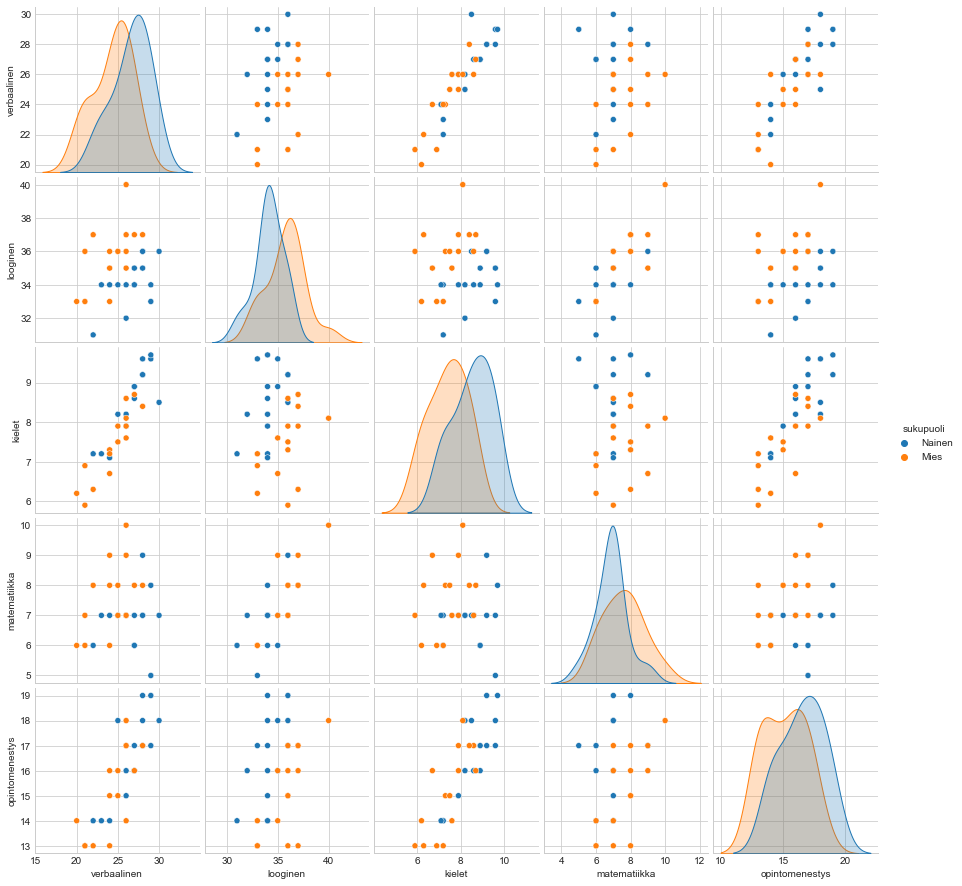

In [27]:
# Tässä teen värierottelun sukupuolen mukaan
sns.pairplot(data=opintomenestys, hue='sukupuoli')

## heatmap

Sopii esimerkiksi korrelaatiomatriisin havainnollistamiseen.

https://seaborn.pydata.org/generated/seaborn.heatmap.html

<AxesSubplot:>

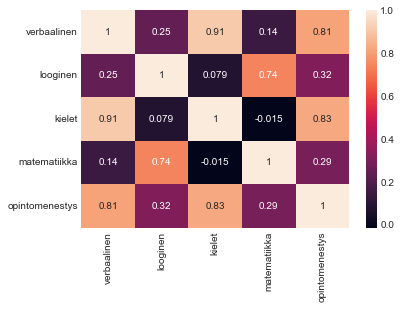

In [28]:
sns.heatmap(data=opintomenestys.corr(), annot = True)